## ICI ON EST EN PLS ##

In [1]:
library("dplyr")
library("FactoMineR")
library("pls")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [2]:
data_20_stations <- read.csv("../data/mesures/donnees_extracted_metro_20.csv")
summary(data_20_stations)

 ID.OMM.station     Date           Pression.au.niveau.mer
 Min.   :7020   Length:465844      Min.   : 95780        
 1st Qu.:7149   Class :character   1st Qu.:101260        
 Median :7510   Mode  :character   Median :101730        
 Mean   :7417                      Mean   :101710        
 3rd Qu.:7650                      3rd Qu.:102230        
 Max.   :7790                      Max.   :104890        
                                   NA's   :50165         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-1780.000                 Min.   :0.000                
 1st Qu.:  -70.000                 1st Qu.:2.000                
 Median :    0.000                 Median :4.000                
 Mean   :    2.588                 Mean   :4.324                
 3rd Qu.:   70.000                 3rd Qu.:7.000                
 Max.   : 1330.000                 Max.   :8.000                
 NA's   :19075                     NA's   :19075                
 Direction.du.ve

In [4]:
clean_data <- function(df, 
                          id_cols = c(
                            "ID.OMM.station", 
                            "communes..code.", 
                            "EPCI..code.", 
                            "department..code.", 
                            "region..code."),
                          cat_cols = c(
                            "Type.de.tendance.barométrique", 
                            "Temps.présent", 
                            "Temps.passé.1", 
                            "Temps.passé.2", 
                            "Type.des.nuages.de.l.étage.inférieur", 
                            "Type.des.nuages.de.l.étage.moyen", 
                            "Type.des.nuages.de.l.étage.supérieur", 
                            "Type.nuage.1", 
                            "Type.nuage.2", 
                            "Type.nuage.3", 
                            "Type.nuage.4", 
                            "mois_de_l_annee", 
                            "Nebulosité.totale", 
                            "Nébulosité..des.nuages.de.l..étage.inférieur", 
                            "Nébulosité.couche.nuageuse.1", 
                            "Nébulosité.couche.nuageuse.2", 
                            "Nébulosité.couche.nuageuse.3", 
                            "Nébulosité.couche.nuageuse.4",
                            "Etat.du.sol",
                            "Periode.de.mesure.de.la.neige.fraiche",
                            "Periode.de.mesure.de.la.rafale"
                            ),
                          other_cols = c()) {
  cat("Columns before cleaning:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")
  
  # Select only numeric columns
  df_numeric <- df %>% select_if(is.numeric)
  cat("Removed NaN columns:", setdiff(colnames(df), colnames(df_numeric)), "\n")
  df <- df %>% select_if(is.numeric)
  cat("Columns after numeric selection:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")
  
  # Remove ID columns
  df_noId <- df[, !names(df) %in% id_cols]
  cat("Removed id colums:", setdiff(colnames(df), colnames(df_numeric)), "\n")
  df <- df_noId
  cat("Columns after removing ID columns:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")
  
  # Remove categorical columns
  df_quantitative <- df[, !names(df) %in% cat_cols]
  cat("Removed qualitative columns:", setdiff(colnames(df), colnames(df_quantitative)), "\n")
  df <- df_quantitative
  cat("Columns after removing categorical columns:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")

  # Remove other colums
  if (length(other_cols) > 0){
    df_nOther <- df[, !names(df) %in% other_cols]
    cat("Removed other columns:", setdiff(colnames(df), colnames(df_nOther)), "\n")
    df <- df_nOther
    cat("Columns after removing other colums:", colnames(df), "\n")
    cat("Data Frame Size:", dim(df), "\n") 
  }
  else {
     cat("No other columns to remove \n")
  }
  
  # Remove rows with NA
  cat("Cleaning NaN rows\n")
  df <- na.omit(df)
  cat("Data Frame Size after NA removal:", dim(df), "\n")

  # Remove constant columns
  const_columns <- sapply(df, function(x) length(unique(x)) == 1)
  df_noConst <- df[, !const_columns]
  cat("Removed constant columns:", setdiff(colnames(df), colnames(df_noConst)), "\n")
  df <- df_noConst
  cat("Columns after removing constant columns:", colnames(df), "\n")
  cat("Data Frame Size:", dim(df), "\n")

  cat("Remaining columns:", colnames(df), "\n")
  
  return(df)
}

# Usage:
data_clean <- clean_data(data_20_stations, other_cols = c(
                                                              "Rafales.sur.une.période", 
                                                              "Température.minimale.sur.12.heures",
                                                              "Température.maximale.sur.12.heures",
                                                              "Température.minimale.sur.24.heures",
                                                              "Température.maximale.sur.24.heures",
                                                              "Température.minimale.sur.12.heures...C.",
                                                              "Température.maximale.sur.12.heures...C.",
                                                              "Température.minimale.sur.24.heures...C.",
                                                              "Température.maximale.sur.24.heures...C.",
                                                              "Hauteur.de.base.1",
                                                              "Hauteur.de.base.2",
                                                              "Hauteur.de.base.3",
                                                              "Hauteur.de.base.4",
                                                              "Niveau.barométrique",
                                                              "Géopotentiel",
                                                              "Précipitations.dans.la.dernière.heure",
                                                              "Précipitations.dans.les.3.dernières.heures",
                                                              "Précipitations.dans.les.6.dernières.heures",
                                                              "Précipitations.dans.les.12.dernières.heures",
                                                              "Précipitations.dans.les.24.dernières.heures"
                                                              ))

head(data_clean, 24)

Columns before cleaning: ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température Point.de.rosée Humidité Visibilité.horizontale Temps.présent Temps.passé.1 Temps.passé.2 Nebulosité.totale Nébulosité..des.nuages.de.l..étage.inférieur Hauteur.de.la.base.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.moyen Type.des.nuages.de.l.étage.supérieur Pression.station Niveau.barométrique Géopotentiel Variation.de.pression.en.24.heures Température.minimale.sur.12.heures Température.minimale.sur.24.heures Température.maximale.sur.12.heures Température.maximale.sur.24.heures Température.minimale.du.sol.sur.12.heures Méthode.de.mesure.Température.du.thermomètre.mouillé Température.du.thermomètre.mouillé Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure.de.la.rafale Etat.du.sol Hauteur.totale.de.la.couche.de

,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,Visibilité.horizontale,Hauteur.de.la.base.des.nuages.de.l.étage.inférieur,Pression.station,Variation.de.pression.en.24.heures,Température.minimale.du.sol.sur.12.heures,Rafale.sur.les.10.dernières.minutes,Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol,Hauteur.de.la.neige.fraîche,Température...C.,Température.minimale.du.sol.sur.12.heures..en..C.,Latitude,Longitude,Altitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7,100400,140,20,13.3,283.85,276.35,60,20000,800,100260,480,279.15,19.8,0,0,10.7,6.0,42.54067,9.485167,10
68,102070,-160,140,4.3,293.75,285.95,61,30000,1250,101930,-270,281.75,6.4,0,0,20.6,8.6,42.54067,9.485167,10
140,100900,160,340,5.7,282.25,277.45,72,40000,800,100750,650,276.05,7.9,0,0,9.1,2.9,42.54067,9.485167,10
145,101160,80,320,6.1,300.55,284.55,37,30000,800,101020,-130,297.35,9.6,0,0,27.4,24.2,42.54067,9.485167,10
154,101860,-130,140,4.1,288.25,282.35,68,25000,1250,101720,20,280.35,5.7,0,0,15.1,7.2,42.54067,9.485167,10
204,101910,20,340,4.6,292.55,290.35,87,10000,250,101770,-270,291.55,7.0,0,0,19.4,18.4,42.54067,9.485167,10
217,103300,40,220,2.2,281.25,280.05,92,12000,800,103150,-30,280.15,2.7,0,0,8.1,7.0,42.54067,9.485167,10
235,100230,160,340,1.3,286.65,279.05,60,15000,800,100090,-140,286.35,2.7,0,0,13.5,13.2,42.54067,9.485167,10
244,101620,0,130,2.6,290.25,286.75,80,50000,800,101480,50,287.85,4.0,0,0,17.1,14.7,42.54067,9.485167,10


Data: 	X dimension: 6345 19 
	Y dimension: 6345 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.335    2.370    1.505    1.069   0.6225   0.4674   0.3566
adjCV        6.335    2.369    1.505    1.068   0.6219   0.4678   0.3566
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.3104   0.2972   0.2924    0.2841    0.2745    0.2201   0.08370
adjCV   0.3102   0.2971   0.2924    0.2842    0.2745    0.2200   0.08321
       14 comps  15 comps  16 comps   17 comps   18 comps   19 comps
CV      0.04067   0.02478   0.01059  0.0003752  9.759e-13  0.0028067
adjCV   0.04005   0.02272   0.01084  0.0003674  7.764e-13  0.0008184

TRAINING: % variance explained
             1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X              22.60    38.18    45.63    50.29    59.38    66.39    71.80
Temp

       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.335    2.370    1.505    1.069   0.6225   0.4674   0.3566
adjCV        6.335    2.369    1.505    1.068   0.6219   0.4678   0.3566
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.3104   0.2972   0.2924    0.2841    0.2745    0.2201   0.08370
adjCV   0.3102   0.2971   0.2924    0.2842    0.2745    0.2200   0.08321
       14 comps  15 comps  16 comps   17 comps   18 comps   19 comps
CV      0.04067   0.02478   0.01059  0.0003752  9.759e-13  0.0028067
adjCV   0.04005   0.02272   0.01084  0.0003674  7.764e-13  0.0008184

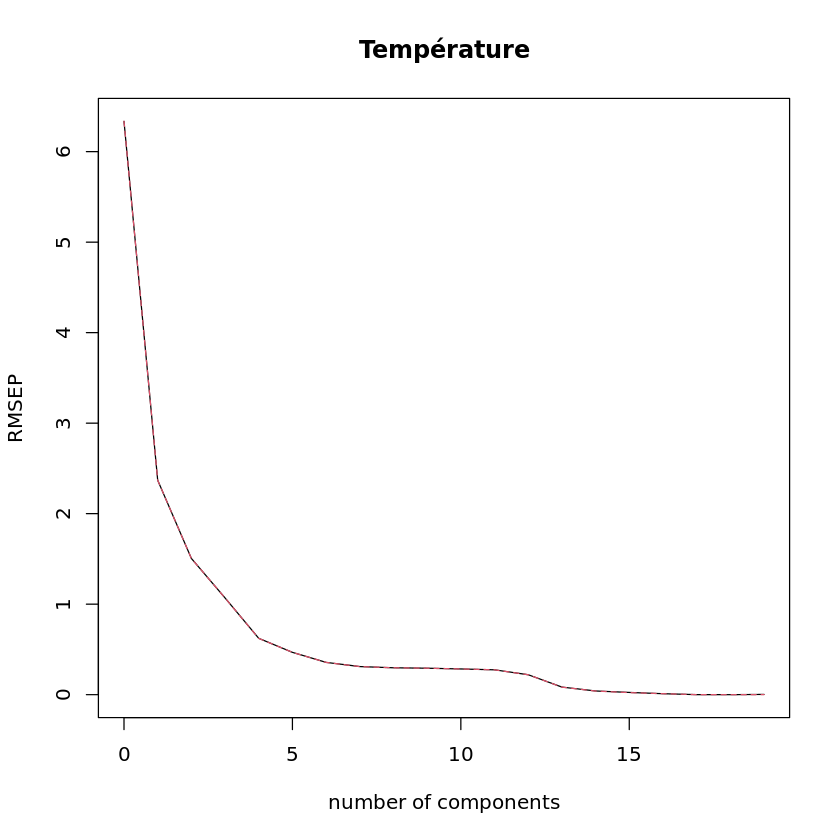

In [13]:
pls_temp <- plsr(Température ~ ., data = data_clean, scale = TRUE, validation = "CV")
summary(pls_temp)
rmse <- RMSEP(pls_temp)
rmse
# cat("RMSE:", rmse, "\n")
validationplot(pls_temp, val.type="RMSEP")